In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import geopandas as gpd
import seaborn as sns

sns.set()

%matplotlib inline

In [21]:
data = pd.read_csv('../dataset/geo.csv', index_col=0)
data

,lat,lon,country,city,match_score,location_string
id,,,,,,
48,52.478910,-1.905920,GBR,Birmingham,100.0,birmingham
49,51.453790,-2.591680,GBR,Bristol,73.0,est. september 2012 - bristol
50,7.188100,21.093750,NaN,NaN,100.0,africa
52,39.952220,-75.162180,USA,Philadelphia,100.0,"philadelphia, pa"
53,51.506420,-0.127210,GBR,London,100.0,"london, uk"
...,...,...,...,...,...,...
8685,42.910975,-78.865828,USA,Buffalo,100.0,"ìït: 42.910975,-78.865828"
9081,27.913602,-81.607853,USA,Lake Wales,100.0,"ìït: 27.9136024,-81.6078532"
9161,19.600858,-99.047821,MEX,Ecatepec de Morelos,100.0,"19.600858, -99.047821"


Descartamos los de score menor a 90

In [4]:
data = data[data['match_score'] >= 90]
data

,lat,lon,country,city,match_score,location_string
id,,,,,,
48,52.478910,-1.905920,GBR,Birmingham,100.0,birmingham
50,7.188100,21.093750,NaN,NaN,100.0,africa
52,39.952220,-75.162180,USA,Philadelphia,100.0,"philadelphia, pa"
53,51.506420,-0.127210,GBR,London,100.0,"london, uk"
54,-25.745870,28.187640,ZAF,Tshwane,100.0,pretoria
...,...,...,...,...,...,...
8685,42.910975,-78.865828,USA,Buffalo,100.0,"ìït: 42.910975,-78.865828"
9081,27.913602,-81.607853,USA,Lake Wales,100.0,"ìït: 27.9136024,-81.6078532"
9161,19.600858,-99.047821,MEX,Ecatepec de Morelos,100.0,"19.600858, -99.047821"


In [5]:
import math
countries = data['country'].value_counts()
countries = countries.to_frame().reset_index()
countries = countries.rename(columns={'index': 'country', 'country': 'tweets'})
countries

,country,tweets
0,USA,2125
1,GBR,395
2,CAN,206
3,IND,148
4,AUS,110
...,...,...
116,MKD,1
117,BVT,1
118,LBY,1
119,FRO,1


In [6]:
main_countries = countries[:7]
main_countries = main_countries.append({'country': 'OTHERS', 'tweets': countries.loc[7:, 'tweets'].sum()}, ignore_index=True)
main_countries

,country,tweets
0,USA,2125
1,GBR,395
2,CAN,206
3,IND,148
4,AUS,110
5,NGA,78
6,ZAF,48
7,OTHERS,732


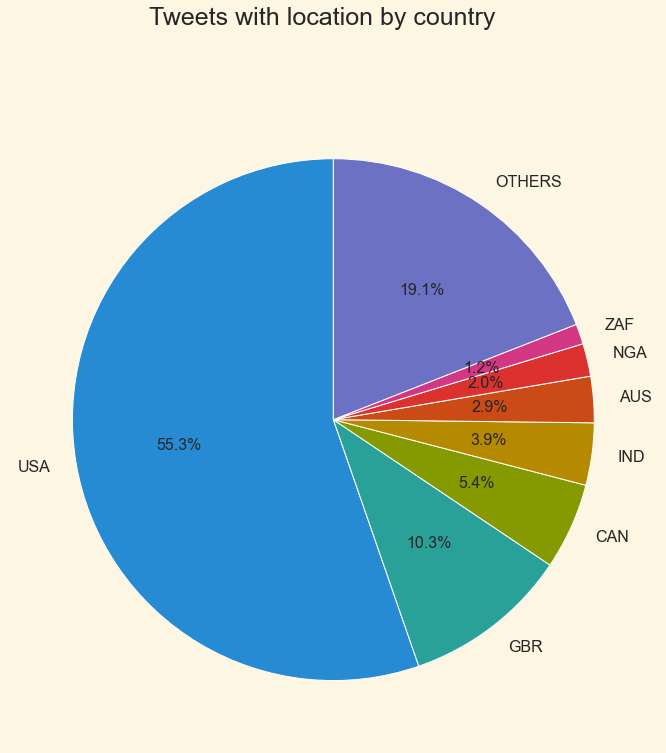

In [20]:
plt.style.use('Solarize_Light2')
fig1, ax1 = plt.subplots(figsize=(12, 12))
fig1.suptitle('Tweets with location by country', fontsize=25)
ax1.pie(main_countries['tweets'], labels=main_countries['country'], autopct='%1.1f%%',
        startangle=90, textprops={'fontsize': 16})
plt.savefig('tweets-with-location-by-country.png')
plt.show()

In [8]:
cities = data['city'].value_counts()
cities

New York          144
London             96
Los Angeles        57
Washington         52
Chicago            41
                 ... 
Bushkill            1
Guwahati            1
Haverford           1
Port Charlotte      1
St Cloud            1
Name: city, Length: 1090, dtype: int64

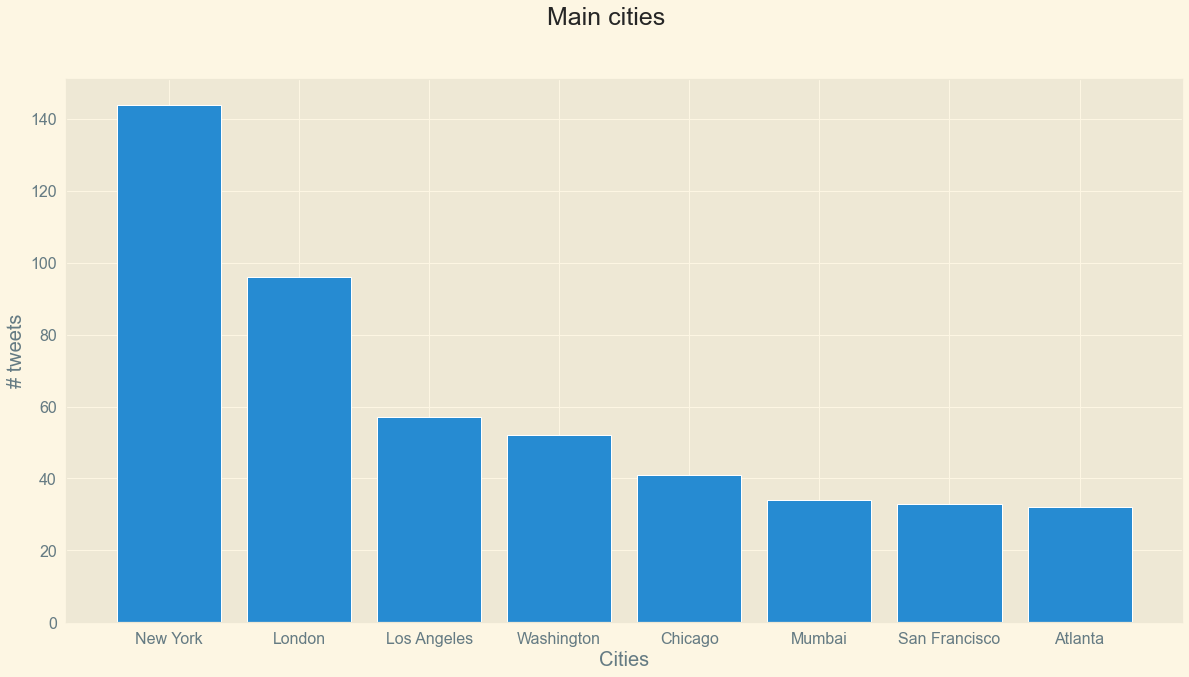

In [34]:
main_cities = cities.head(8)

plt.style.use('Solarize_Light2')
fig1, ax1 = plt.subplots(figsize=(20, 10))
fig1.suptitle('Main cities', fontsize=25)
ax1.bar(main_cities.index, main_cities)
ax1.set_xlabel('Cities', fontsize=20)
ax1.set_ylabel('# tweets', fontsize=20)
ax1.tick_params(axis='both', labelsize=16)
plt.savefig('main-cities.png')
plt.show()

In [9]:
shapefile = '../map/ne_50m_admin_0_countries.shp'
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
gdf.columns = ['country', 'country_code', 'geometry']
gdf = gdf.drop(gdf.index[239])
merged = gdf.merge(countries, left_on='country_code', right_on='country' , how='left')
merged.fillna(0, inplace = True)

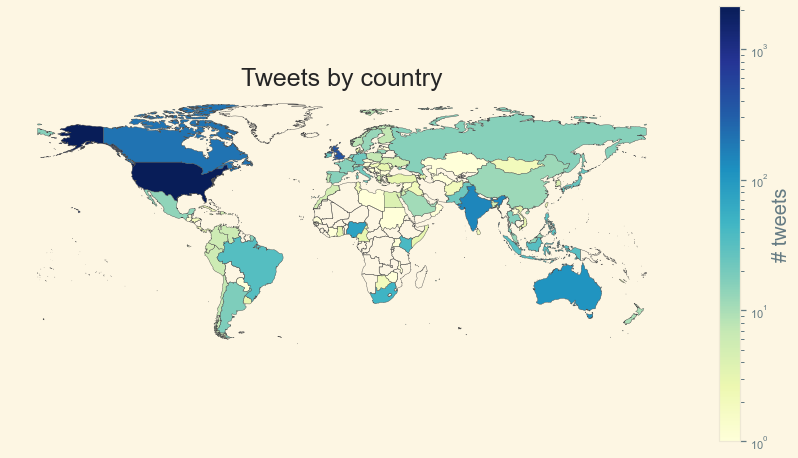

In [10]:
vmin, vmax = countries['tweets'].min(), countries['tweets'].max()
norm = colors.LogNorm(vmin=vmin, vmax=vmax)

fig, ax = plt.subplots(1, figsize=(15, 8))
merged.plot(column='tweets', cmap='YlGnBu', linewidth= 0.4 , ax=ax, edgecolor='0.3', norm=norm)
#Le saco los ejes
ax.axis('off')

#Titulo
ax.set_title('Tweets by country', fontdict={'fontsize': '25', 'fontweight' : '3'})

#Barra indicadora
sm = plt.cm.ScalarMappable(cmap='YlGnBu', norm=norm)
cbar = fig.colorbar(sm)

cbar.set_label('# tweets',size = 20)
plt.savefig('tweets-map.png')